In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.table import Table

In [2]:
t = Table.read('/tmp/nnpz_compare/r_shift9/n_real_65ce2ef21faf0cdf5edae8fb253e6b25.fits')

<IPython.core.display.Javascript object>


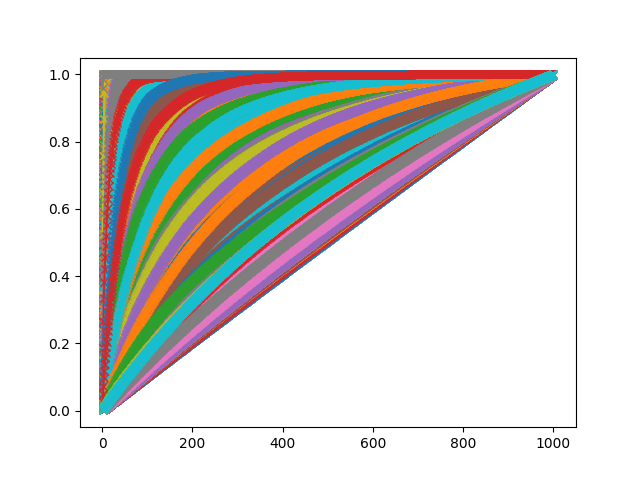

In [9]:
plt.figure(1)
for r in t:
    plt.plot(np.arange(1,1001), np.cumsum(-np.sort(-r['NeighborWeights']) / np.sum(r['NeighborWeights'])), 'x-')

In [4]:
w_sum = np.sum(t['NeighborWeights'], axis=1)
w_norm = np.flip(np.sort(t['NeighborWeights'] / w_sum[:, None]), axis=1)

In [5]:
w_cumsum = np.cumsum(w_norm, axis=1)

<IPython.core.display.Javascript object>


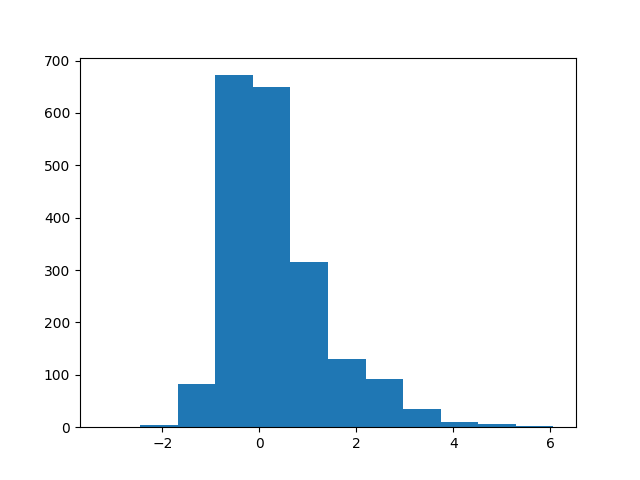

In [42]:
plt.figure()
_, bins, patches = plt.hist(np.log(t['r_obs']), bins=12)

In [43]:
grouped = []
for i in range(len(bins)-1):
    mask = np.logical_and(t['r_obs'] >= np.exp(bins[i]), t['r_obs'] < np.exp(bins[i+1]))
    grouped.append(t[mask])

<IPython.core.display.Javascript object>


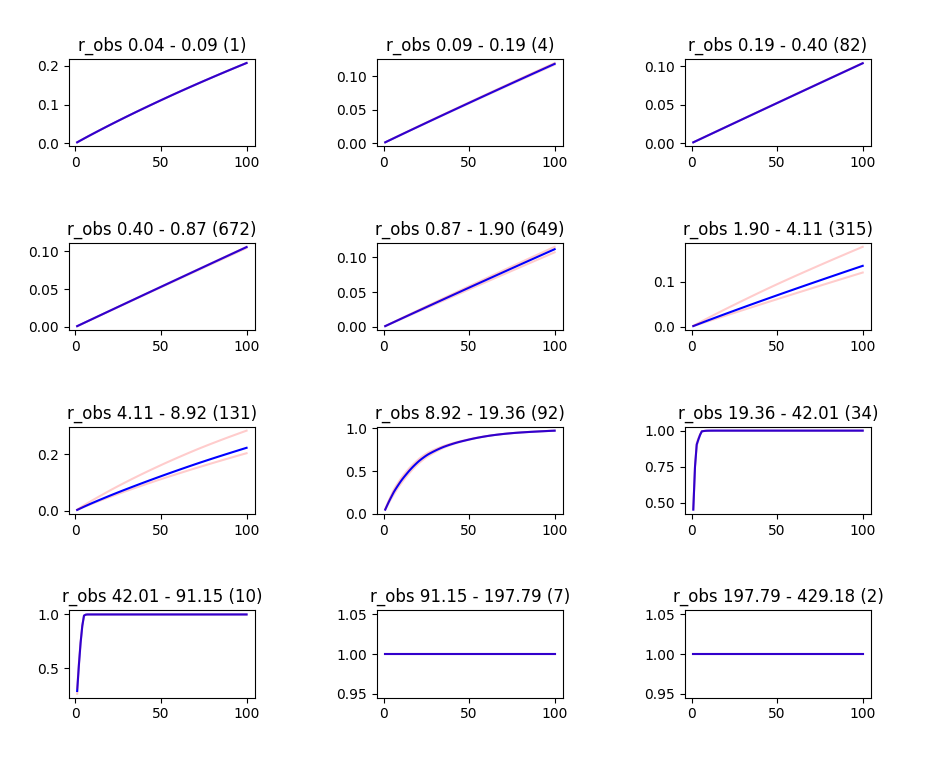

1999


In [57]:
plt.figure()
cols = 3
rows = len(bins) / cols
total = 0
for i in range(len(bins)-1):
    plt.subplot(rows, cols, i+1)
    w_sum = np.sum(grouped[i]['NeighborWeights'], axis=1)
    w_norm = np.flip(np.sort(grouped[i]['NeighborWeights'] / w_sum[:, None]), axis=1)
    w_cumsum = np.cumsum(w_norm, axis=1)
    
    p = np.percentile(w_cumsum[:,0:100], q=[0.10,0.5,0.90], axis=0)
    _ = plt.plot(np.arange(1, 101), p[0], c='r', alpha=0.2)
    _ = plt.plot(np.arange(1, 101), p[1], c='b')
    _ = plt.plot(np.arange(1, 101), p[2], c='r', alpha=0.2)
    rmin, rmax = np.exp(bins[i]), np.exp(bins[i+1])
    plt.title(f'r_obs {rmin:.2f} - {rmax:.2f} ({len(grouped[i])})')
    total += len(grouped[i])
    
plt.tight_layout()
print(total)